In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import os.path
from tqdm import tqdm


'''
basic info
'''
idir = "/home/sw/Work5-SR/data/interim/DOY"
odir = "/home/sw/Work5-SR/data/dataset"
cdir = "/home/sw/Work5-SR/dependency/coords"
pname = "CLDAS"; var_name = "pre"
window = 5

coords = np.load(os.path.join(cdir, f"{pname}.coords.npz"))
n_lat = len(coords['lat']); n_lon = len(coords['lon'])

time_range = pd.date_range(start=pd.to_datetime('2008-01-01'),
                          end=pd.to_datetime('2017-12-31'), 
                          freq='D')
time_range = time_range[:-window+1]  # locate start of each window
n_time_total = len(time_range)

pre_fname = os.path.join(odir, f"CLDAS.pre.{n_lat}x{n_lon}.{window}d.dat")
meta = pd.read_csv(os.path.join(odir, f"CLDAS.meta.{window}d.csv"))

In [2]:
arr_dataset = np.memmap(pre_fname, dtype=np.float32, mode='r+', 
              shape=(n_time_total, n_lat, n_lon))

In [3]:
# random select 1000 samples
n_samples_sel = 1000
samples = np.random.choice(n_time_total, n_samples_sel)

arr_samples_sel = arr_dataset[samples]
meta = meta.iloc[samples]

In [5]:
import matplotlib.pyplot as plt

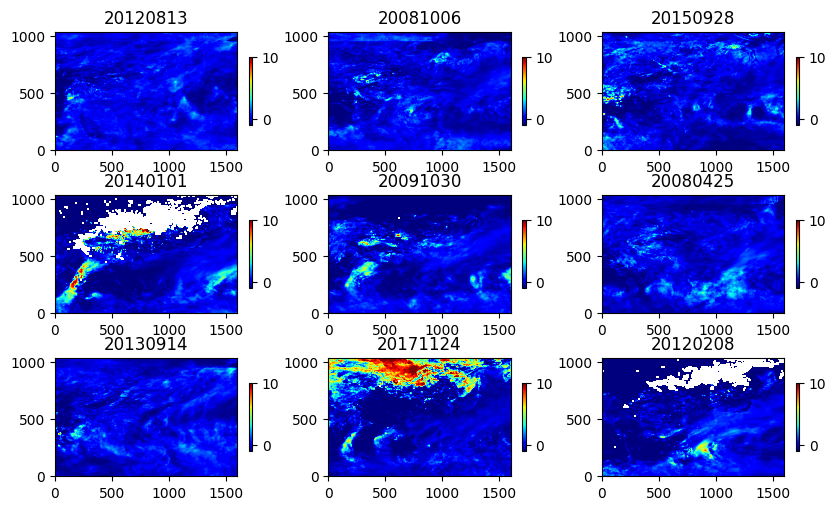

In [26]:
fig, axs = plt.subplots(3, 3, figsize=(10, 6))
for i in range(9):
    ax = axs[i//3, i%3]
    ims = ax.imshow(arr_samples_sel[i], cmap='jet', vmin=-1, vmax=10, origin='lower')
    plt.colorbar(ims, ax=ax, shrink=0.5)
    ax.set_title(f"{meta.iloc[i]['year']}{meta.iloc[i]['month']:02d}{meta.iloc[i]['day']:02d}")

(array([2.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 2.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 6.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 2.0000000e+00, 0.0000000e+00, 6.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 3.0000000e+00,
        1.0000000e+00, 2.0000000e+01, 7.0000000e+00, 2.5000000e+01,
        6.3600000e+02, 1.6592179e+09, 4.3000000e+01, 7.0000000e+00,
        2.0000000e+00, 4.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 2.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e

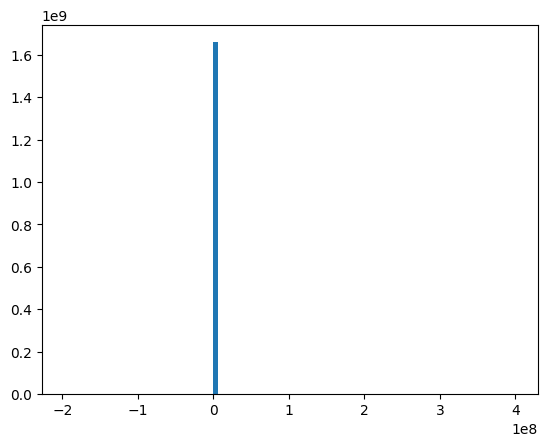

In [6]:
plt.hist(arr_samples_sel[:].flatten(), bins=100)

(array([4.35800000e+03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.96469252e+08,
        8.76333070e+07, 9.25606440e+07, 1.02411853e+08, 1.12275029e+08,
        1.18571542e+08, 1.19463086e+08, 1.14244344e+08, 1.04035617e+08,
        9.08970180e+07, 7.66396100e+07, 6.30237160e+07, 5.08098380e+07,
        4.04170260e+07, 3.19585130e+07, 2.52284350e+07, 1.99496450e+07,
        1.58862020e+07, 1.27736190e+07, 1.04010810e+07, 8.56132900e+06,
        7.11022100e+06, 5.95579500e+06, 5.03981700e+06, 4.31186000e+06,
        3.71674900e+06, 3.22586100e+06, 2.83181500e+06, 2.50043400e+06,
        2.21834500e+06, 1.98308300e+06, 1.77979100e+06, 1.60548700e+06,
        1.45245900e+06, 1.32337700e+06, 1.21048100e+06, 1.10871100e+06,
        1.02062300e+06, 9.43561000e+05, 8.71805000e+05, 8.114110

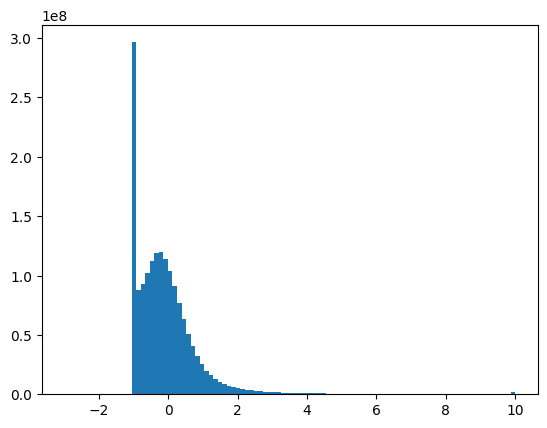

In [16]:
arr_clip = np.clip(arr_samples_sel[:].flatten(), -3, 10)
plt.hist(arr_clip, bins=100)

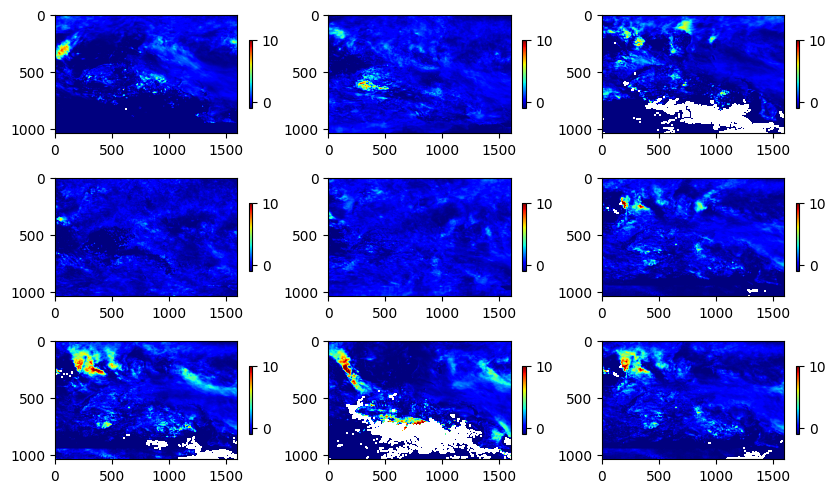

In [18]:
arr_clip = np.clip(arr_samples_sel, -3, 10)
fig, axs = plt.subplots(3, 3, figsize=(10, 6))
for i in range(9):
    ax = axs[i//3, i%3]
    ims = ax.imshow(arr_clip[i+100], cmap='jet', vmin=-1, vmax=10)
    plt.colorbar(ims, ax=ax, shrink=0.5)

(array([2.8546835e+08, 4.2594110e+07, 4.1052620e+07, 4.1409282e+07,
        4.2733491e+07, 4.4513961e+07, 4.6473633e+07, 4.8493566e+07,
        5.0483262e+07, 5.2162137e+07, 5.3491333e+07, 5.4322034e+07,
        5.4597825e+07, 5.4272829e+07, 5.3448402e+07, 5.2041526e+07,
        5.0104948e+07, 4.7723457e+07, 4.5021004e+07, 4.2118702e+07,
        3.9118176e+07, 3.6082489e+07, 3.3106607e+07, 3.0200030e+07,
        2.7466217e+07, 2.4879438e+07, 2.2485600e+07, 2.0256920e+07,
        1.8225154e+07, 1.6359581e+07, 1.4725324e+07, 1.3225281e+07,
        1.1869752e+07, 1.0673006e+07, 9.6004450e+06, 8.6428840e+06,
        7.7993710e+06, 7.0474060e+06, 6.3964370e+06, 5.8144430e+06,
        5.3000600e+06, 4.8414850e+06, 4.4315100e+06, 4.0734400e+06,
        3.7445480e+06, 3.4521730e+06, 3.1868170e+06, 2.9489920e+06,
        2.7316930e+06, 2.5425460e+06, 2.3634470e+06, 2.2054350e+06,
        2.0617200e+06, 1.9325700e+06, 1.8118500e+06, 1.6998820e+06,
        1.6022320e+06, 1.5149110e+06, 1.4251020e

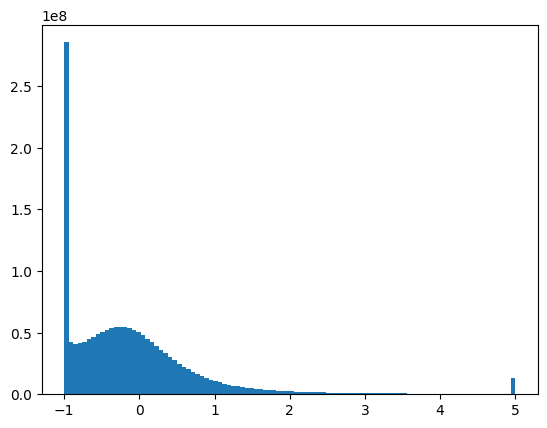

In [8]:
arr_clip = np.clip(arr_samples_sel[:].flatten(), -1, 5)
plt.hist(arr_clip, bins=100)

/public/soft/anaconda3/envs/meteo-stable/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


(array([1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 2.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 2.00000e+00,
        1.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 2.00000e+00,
        3.00000e+00, 1.00000e+00, 6.00000e+00, 3.00000e+00, 0.00000e+00,
        7.00000e+00, 1.10000e+01, 1.20000e+01, 1.10000e+01, 1.40000e+01,
        1.80000e+01, 1.30000e+01, 2.50000e+01, 3.10000e+01, 3.50000e+01,
        3.90000e+01, 5.60000e+01, 7.50000e+01, 7.00000e+01, 9.70000e+01,
        1.30000e+02, 1.77000e+02, 1.96000e+02, 2.55000e+02, 3.29000e+02,
        4.14000e+02, 4.99000e+02, 6.04000e+02, 7.68000e+02, 9.01000e+02,
        1.06800e+03, 1.40000e+03, 1.76600e+03, 2.10400e+03, 2.54800e+03,
        3.34200e+03, 3.90200e+03, 4.92200e+03, 5.96700e+03, 7.31300e+03,
        9.13400e+03, 1.10410e+04, 1.35820e+04, 1.67840e+04, 2.04410e+04,
        2.48000e+04, 2.99390e+04, 3.59340e+04, 4.33

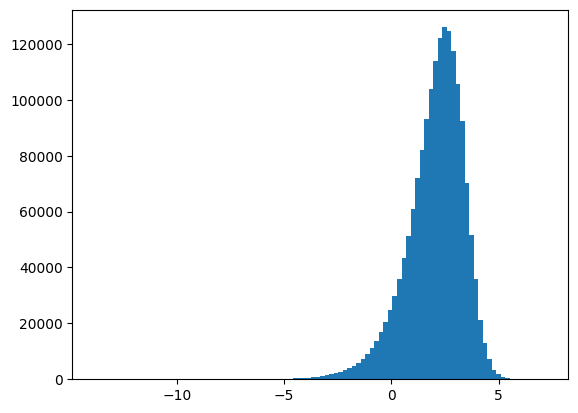

In [7]:
MIN = np.nanmin(arr_samples_sel)
arr_samples_sel_fin = np.nan_to_num(arr_samples_sel, nan=0)
log_samples = np.log(arr_samples_sel + MIN + 1e-6)
plt.hist(log_samples[:].flatten(), bins=100)

In [8]:
MIN

-45.163216

(array([3.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.00000000e+00,
        2.00000000e+00, 8.00000000e+00, 2.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00, 4.00000000e+00,
        3.00000000e+00, 0.00000000e+00, 3.00000000e+00, 4.00000000e+00,
        4.00000000e+00, 9.00000000e+00, 6.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 1.00000000e+01, 2.00000000e+00,
        0.00000000e+00, 7.00000000e+00, 3.00000000e+00, 0.00000000e+00,
        7.00000000e+00, 1.00000000e+00, 0.00000000e+00, 7.00000000e+00,
        0.00000000e+00, 4.00000000e+00, 1.00000000e+00, 6.00000000e+00,
        0.00000000e+00, 8.00000000e+00, 9.00000000e+00, 1.60000000e+01,
        6.40000000e+01, 1.32000000e+02, 1.99000000e+02, 2.540000

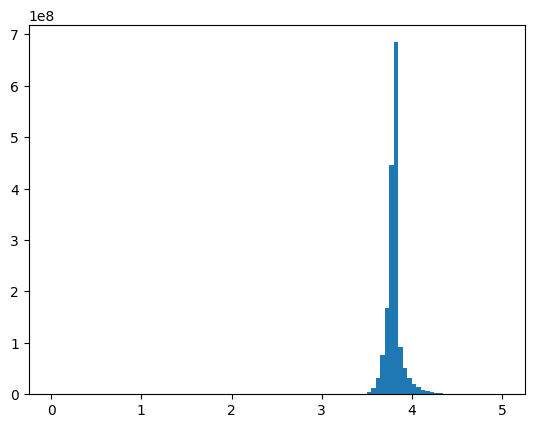

In [9]:
MIN = np.nanmin(arr_samples_sel)
arr_samples_sel_fin = np.nan_to_num(arr_samples_sel, nan=0)
log_samples = np.log(arr_samples_sel - MIN + 1e-6)
log_samples = np.clip(log_samples, 0, 5)
plt.hist(log_samples[:].flatten(), bins=100)

In [11]:
np.nanmin(log_samples)

0.0

In [19]:
# 99 quantile
np.nanpercentile(log_samples, 99)

4.181585311889648

In [20]:
np.nanpercentile(log_samples, 1)

3.5994083881378174